In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
data = pd.read_excel('/content/drive/MyDrive/Time Series Data /Package_Master_HBP_1_0_6Jan2019.xlsx')

In [117]:
data.head()

,Speciality ID,Speciality Name,Procedure ID,Procedure Name,Package Amount,Preauth Required,Procedure Type,Government Reserved,Pre Investigations,Post Investigations
0,M1,General Medicine,M100001,Acute gastroenteritis with moderate dehydration,0,No,Trust,YES,"clinical notes,Clinical notes","Clinical notes,clinical notes"
1,M1,General Medicine,M100002,Recurrent vomiting with dehydration,0,No,Trust,YES,"clinical notes,Clinical notes","clinical notes,Clinical notes"
2,M1,General Medicine,M100003,Dysentery,0,No,Trust,YES,"Clinical notes,clinical notes","Clinical notes,clinical notes"
3,M1,General Medicine,M100004,Renal colic,0,No,Trust,YES,"Clinical notes,clinical notes","Clinical notes,clinical notes"
4,M1,General Medicine,M100005,Acute bronchitis,0,No,Trust,YES,"clinical notes,Clinical notes","Clinical notes,clinical notes"


In [118]:
data.shape

(1416, 10)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Speciality ID        1416 non-null   object
 1   Speciality Name      1416 non-null   object
 2   Procedure ID         1416 non-null   object
 3   Procedure Name       1416 non-null   object
 4   Package Amount       1416 non-null   int64 
 5   Preauth Required     1416 non-null   object
 6   Procedure Type       1416 non-null   object
 7   Government Reserved  1416 non-null   object
 8   Pre Investigations   1398 non-null   object
 9   Post Investigations  1395 non-null   object
dtypes: int64(1), object(9)
memory usage: 110.8+ KB


In [120]:
data.head(1)

,Speciality ID,Speciality Name,Procedure ID,Procedure Name,Package Amount,Preauth Required,Procedure Type,Government Reserved,Pre Investigations,Post Investigations
0,M1,General Medicine,M100001,Acute gastroenteritis with moderate dehydration,0,No,Trust,YES,"clinical notes,Clinical notes","Clinical notes,clinical notes"


In [121]:
data_1 = data[['Speciality Name','Procedure ID','Procedure Name','Package Amount','Procedure Type']]

In [122]:
data_1.head()

,Speciality Name,Procedure ID,Procedure Name,Package Amount,Procedure Type
0,General Medicine,M100001,Acute gastroenteritis with moderate dehydration,0,Trust
1,General Medicine,M100002,Recurrent vomiting with dehydration,0,Trust
2,General Medicine,M100003,Dysentery,0,Trust
3,General Medicine,M100004,Renal colic,0,Trust
4,General Medicine,M100005,Acute bronchitis,0,Trust


In [123]:
data_1.isnull().sum()

Speciality Name    0
Procedure ID       0
Procedure Name     0
Package Amount     0
Procedure Type     0
dtype: int64

In [124]:
data_1['Package Amount'].value_counts()

0         201
10000     117
15000     115
20000     107
30000      87
         ... 
200000      1
155000      1
145000      1
95000       1
400000      1
Name: Package Amount, Length: 85, dtype: int64

In [125]:
data_1['Speciality Name'].value_counts()

General Surgery                                                   255
Urology                                                           163
Orthopaedics                                                      102
Paediatric medical management                                     102
Otorhinolaryngology                                                95
Cardio-thoracic and Vascular surgery                               93
Neurosurgery                                                       84
Obstetrics and Gynaecology                                         82
General Medicine                                                   72
Medical Oncology                                                   55
Surgical Oncology                                                  49
Opthalmology                                                       43
Cardiology                                                         40
Paediatric cancer                                                  38
Paediatric surgery  

In [126]:
data_1['Procedure ID'].value_counts()

U100       16
M100001     1
S300026     1
S300034     1
S300033     1
           ..
S100154     1
S100153     1
S100152     1
S100151     1
S900015     1
Name: Procedure ID, Length: 1401, dtype: int64

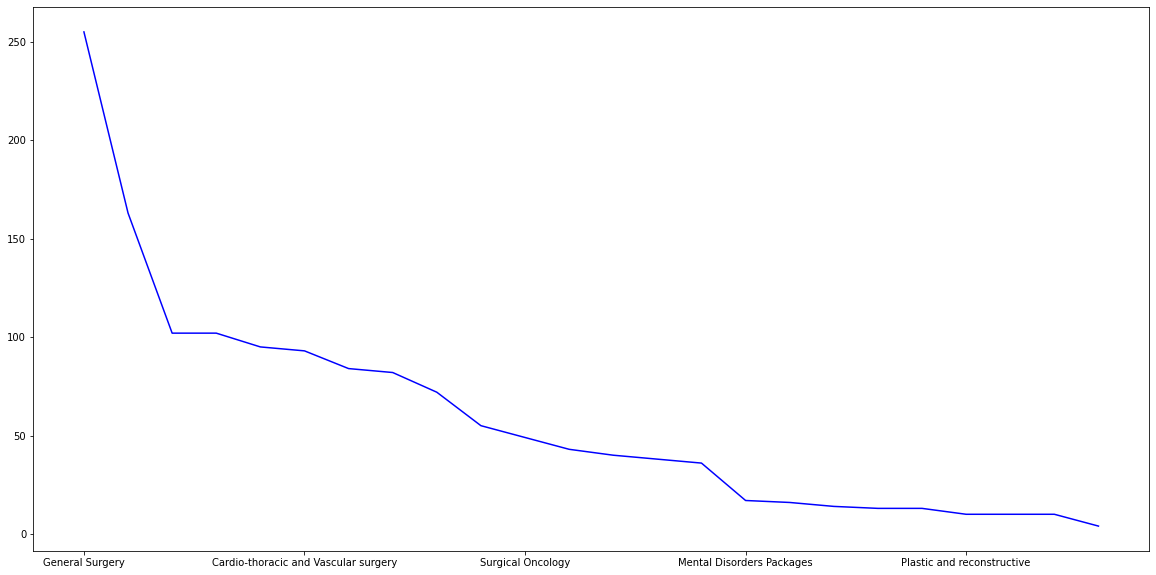

In [127]:
data_1['Speciality Name'].value_counts().plot(kind='line',color=['Blue','Orange','Red'],figsize=[20,10],marker = '')

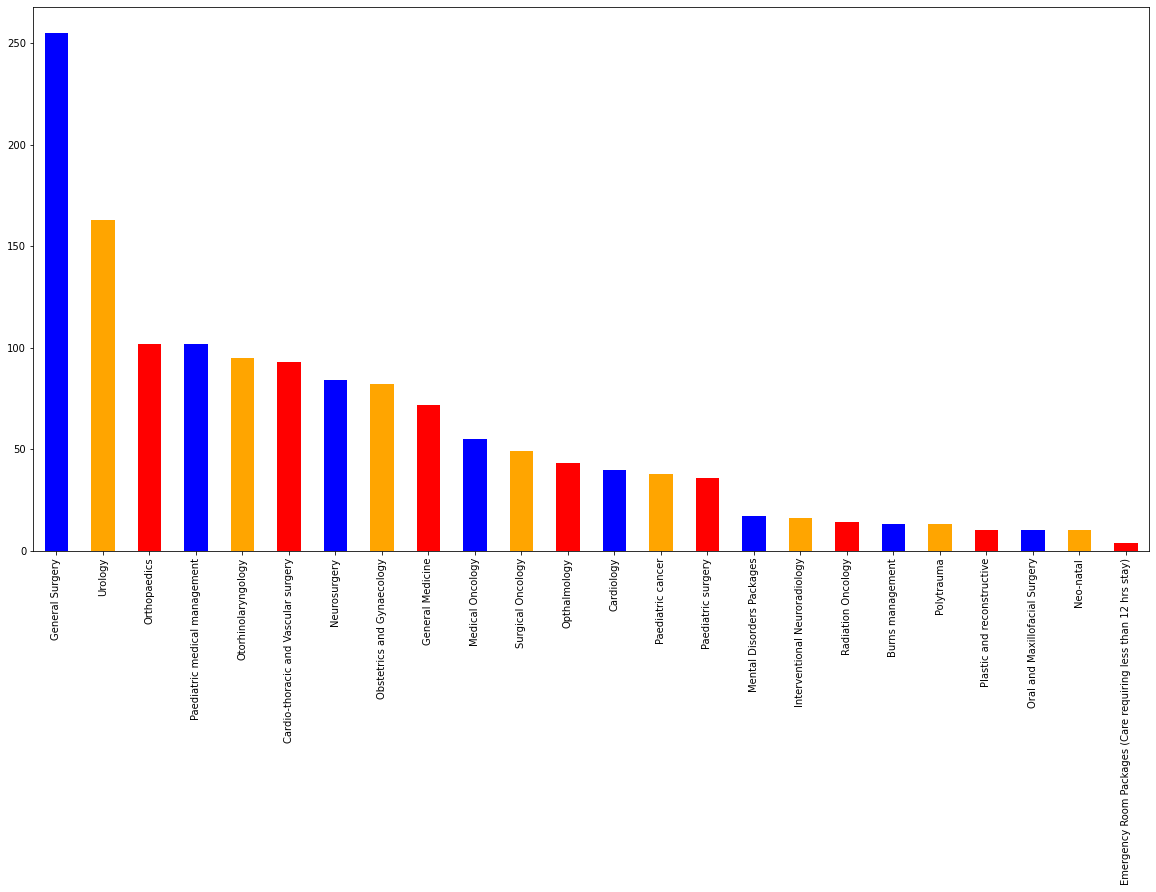

In [128]:
data_1['Speciality Name'].value_counts().plot(kind='bar',color=['Blue','Orange','Red'],figsize=[20,10])
plt.show()

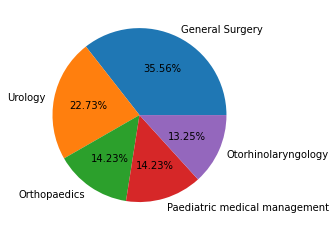

In [129]:
Speciality_index = data_1['Speciality Name'].value_counts().index
Speciality_value = data_1['Speciality Name'].value_counts().values

plt.pie(Speciality_value[:5],labels = Speciality_index[:5],autopct = '%1.2f%%')
plt.show()

In [130]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [131]:
data_1['Speciality Name'] = labelencoder.fit_transform(data_1['Speciality Name'])
data_1['Procedure ID'] = labelencoder.fit_transform(data_1['Procedure ID'])
data_1['Procedure Name'] = labelencoder.fit_transform(data_1['Procedure Name'])
data_1['Procedure Type'] = labelencoder.fit_transform(data_1['Procedure Type'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

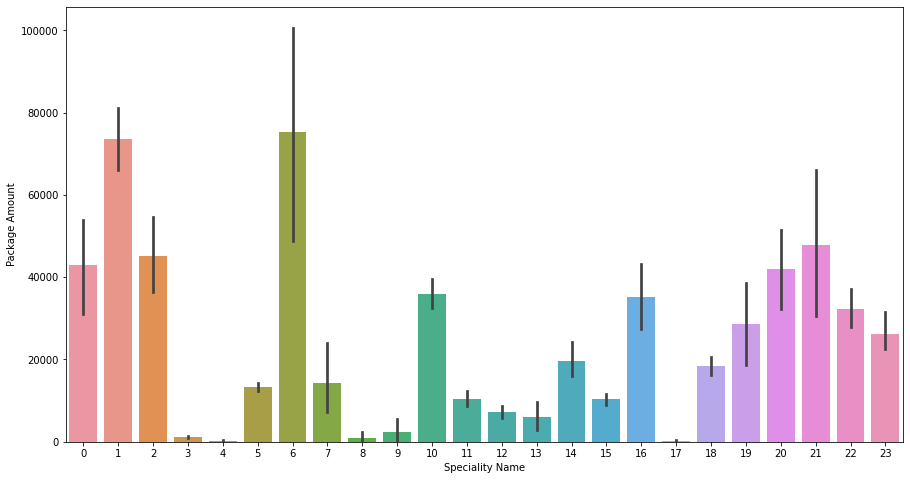

In [132]:
plt.rcParams['figure.figsize'] =  (15,8)
sns.barplot(x = "Speciality Name",y = "Package Amount",data = data_1)
plt.show()

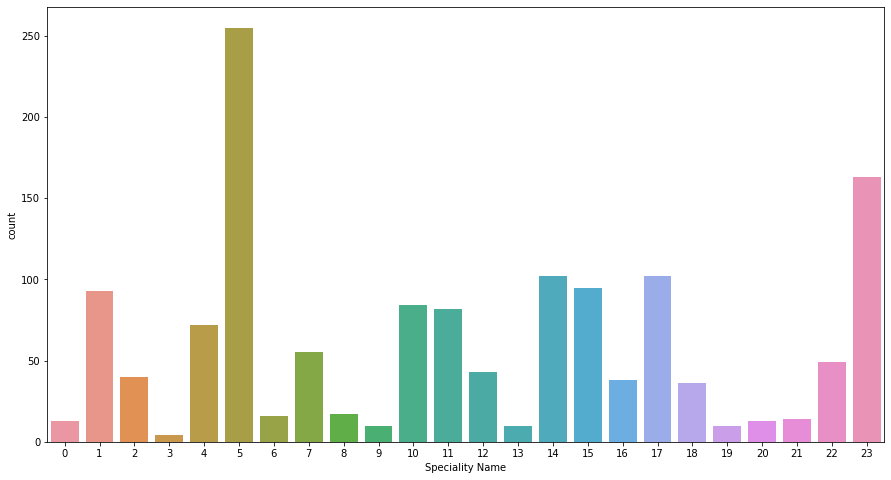

In [133]:
  sns.countplot(x = "Speciality Name",data = data_1)
  plt.show()

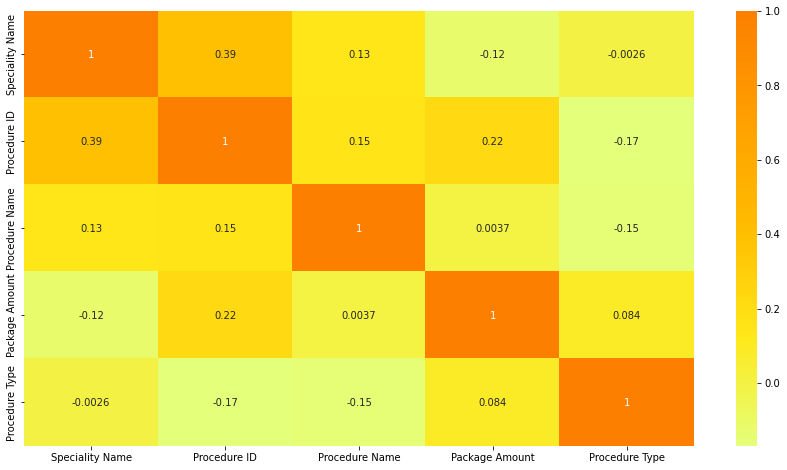

In [134]:
# correlation plot
corr = data_1.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

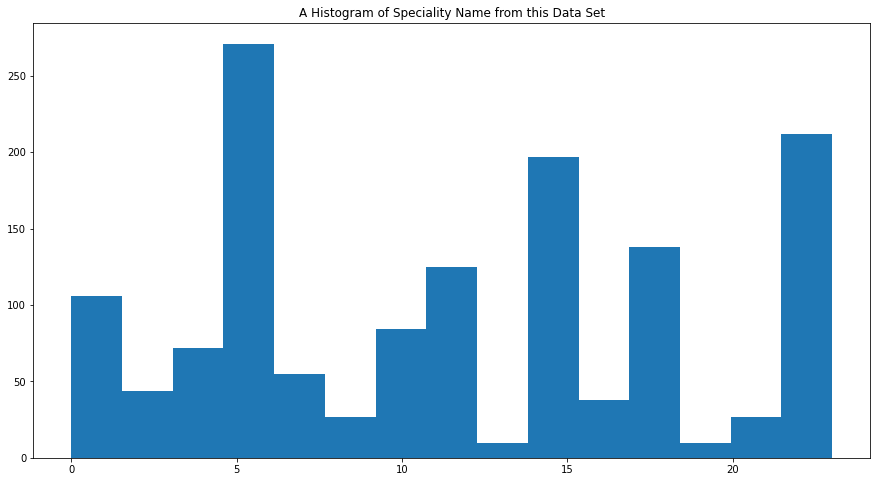

In [135]:
plt.hist(data_1['Speciality Name'], bins = 15)
plt.title('A Histogram of Speciality Name from this Data Set')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


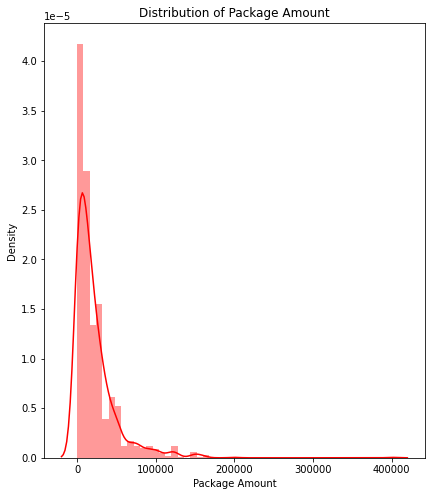

In [136]:
f= plt.figure(figsize=(15,8))

ax=f.add_subplot(121)
sns.distplot(data_1['Package Amount'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of Package Amount')
plt.show()

In [137]:
data_1.head()

,Speciality Name,Procedure ID,Procedure Name,Package Amount,Procedure Type
0,4,0,36,0,1
1,4,1,1043,0,1
2,4,2,406,0,1
3,4,3,1057,0,1
4,4,4,29,0,1


In [138]:
x = data_1.iloc[:, [0,1,2,4]]
y = data_1.iloc[:, [3]]

In [139]:
x

,Speciality Name,Procedure ID,Procedure Name,Procedure Type
0,4,0,36,1
1,4,1,1043,1
2,4,2,406,1
3,4,3,1057,1
4,4,4,29,1
...,...,...,...,...
1411,6,1396,687,1
1412,6,1397,691,1
1413,6,1398,991,1
1414,6,1399,1364,1


In [140]:
y

,Package Amount
0,0
1,0
2,0
3,0
4,0
...,...
1411,160000
1412,160000
1413,40000
1414,40000


In [141]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()

# standardization 
scale_x = object.fit_transform(x) 

In [142]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()

# standardization 
scale_y = object.fit_transform(y) 

In [143]:
scale_x

array([[-1.066222  , -1.73123346, -1.64378809,  0.11023401],
       [-1.066222  , -1.7287862 ,  0.86234082,  0.11023401],
       [-1.066222  , -1.72633893, -0.72296614,  0.11023401],
       ...,
       [-0.78117143,  1.69004473,  0.73292801,  0.11023401],
       [-0.78117143,  1.69249199,  1.66121607,  0.11023401],
       [-0.78117143,  1.69493926,  1.50940489, -9.07161053]])

In [144]:
scale_y

array([[-0.78247384],
       [-0.78247384],
       [-0.78247384],
       ...,
       [ 0.6355799 ],
       [ 0.6355799 ],
       [-0.78247384]])

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
x_train,x_test,y_train,y_test = train_test_split(scale_x,scale_y,test_size = 0.20, random_state = 2)

In [147]:
x_train.shape

(1132, 4)

In [148]:
x_test.shape

(284, 4)

In [149]:
y_train.shape

(1132, 1)

In [150]:
y_test.shape

(284, 1)

In [151]:
from sklearn.linear_model import LinearRegression

In [152]:
reg = LinearRegression()

In [155]:
reg.fit(x_test , y_test)

LinearRegression()

In [156]:
reg.score(x_test , y_test)

0.09752950959634499